In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 17:41:09.671886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 17:41:09.706376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 17:41:10.221385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_branco_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']
  
dados = dados[['Ano','Cam_branco_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_branco_ind'] = dados.loc[i,'Cam_branco_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_branco_ind'].values
dados.head()

/tmp/ipykernel_55794/175482865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']


,Ano,Cam_branco_ind,Soma,Prop_Cam_branco_ind
0,1982,15.0,178.0,0.084270
1,1983,79.0,324.0,0.243827
2,1984,27.0,245.0,0.110204
3,1996,0.5,203.0,0.002463
4,1998,2.5,221.5,0.011287


In [5]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [7]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos prop ind 1962-2009/.weights.h5', overwrite=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 1.0137
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9890
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9725
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9548
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9365
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9163
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8919
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8608
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8239
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7835
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7382
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6907
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6425
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5962
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5565
Epoch 16/500
1/1 ━

In [19]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos prop ind 1962-2009/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.05010187]
 [0.05386944]
 [0.05765039]
 [0.06142755]
 [0.06542327]
 [0.06919567]
 [0.07285419]
 [0.07661083]
 [0.07945909]
 [0.08225834]
 [0.08498759]
 [0.08761993]
 [0.09029838]
 [0.09348963]
 [0.09708782]
 [0.10184745]
 [0.10756654]
 [0.11361098]
 [0.12060209]
 [0.1285464 ]
 [0.13681656]
 [0.14503619]
 [0.15064377]
 [0.15568653]
 [0.1561633 ]
 [0.15553108]
 [0.14454472]
 [0.12580611]
 [0.09546566]
 [0.06238117]
 [0.02981867]
 [0.00637218]
 [0.        ]
 [0.        ]
 [0.00266141]
 [0.00780525]
 [0.01339183]
 [0.01921698]
 [0.01722924]
 [0.01633119]
 [0.01659925]
 [0.01676689]
 [0.01439684]
 [0.01295691]
 [0.0128821 ]
 [0.01340954]
 [0.01412966]
 [0.01499162]]


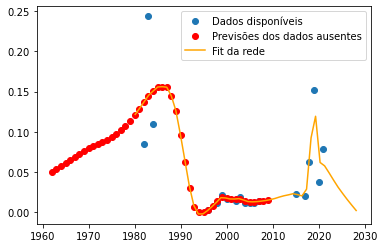

In [8]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

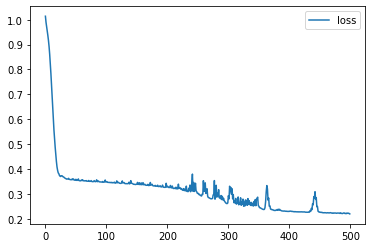

In [9]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [15]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_ind (sem sete_barbas)
df_prev_Camarao_ind = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_ind_sem_sb.xlsx')

for i in range(len(df_prev_Camarao_ind['Ano'])):
       df.loc[i,'Camarao_ind'] = df_prev_Camarao_ind.loc[i,'Camarao_ind']
df = df.replace(np.nan,0)

df_preenchido = df[['Ano','Cam_branco_ind']].replace(np.nan,0)

for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_branco_ind']=df_preenchido.loc[i,'Cam_branco_ind']+df.loc[i,'Camarao_ind']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_ind']*prev_continua[i]
      
df_preenchido = df_preenchido.loc[:2009-1950,:]

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)



#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Previsão Camarao_branco_ind_1962-2009.xlsx')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Ano  Cam_branco_ind  Valor acrescido
0   1950    0.000000e+00     0.000000e+00
1   1951    0.000000e+00     0.000000e+00
2   1952    3.194322e-15     3.194322e-15
3   1953    0.000000e+00     0.000000e+00
4   1954    0.000000e+00     0.000000e+00
5   1955    0.000000e+00     0.000000e+00
6   1956   -6.193196e-15    -6.193196e-15
7   1957    0.000000e+00     0.000000e+00
8   1958    7.772705e-15     7.772705e-15
9   1959   -8.593441e-15    -8.593441e-15
10  1960    0.000000e+00     0.000000e+00
11  1961    0.000000e+00     0.000000e+00
12  1962    1.378629e-01     1.378629e-01
13  1963    7.778261e-01     7.778261e-01
14  1964    1.826300e+00     1.826300e+00
15  1965    3.201496e+00     3.201496e+00
16  1966    4.632433e+00     4.632433e+00
17  1967    9.417212e+00     9.417212e+00
18  1968    2.011198e+01     2.011198e+01
19  1969    1.594092e+01     1.594092e+01
20  1970    2.909286e+01     2.909286e+01
21  1971    3.000650e+01     3.000650e

In [17]:
#Planilha com Camarao_ind decrescido do que ja foi usado de 1962 até 2009 (sete_barbas e branco)
Cam_ind_sem_sb_br_62_09 = df[['Ano','Camarao_ind']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_ind_sem_sb_br_62_09.loc[i,'Camarao_ind']-=Cam_ind_sem_sb_br_62_09.loc[i,'Camarao_ind']*prev_continua[i]

Cam_ind_sem_sb_br_62_09 = Cam_ind_sem_sb_br_62_09.iloc[:2010-1950,:]
with pd.option_context('display.max_rows', None,):
  print(Cam_ind_sem_sb_br_62_09)

Cam_ind_sem_sb_br_62_09.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Cam_ind_sem_sb_br_62-09.xlsx')

     Ano   Camarao_ind
0   1950  0.000000e+00
1   1951  0.000000e+00
2   1952  2.021547e-13
3   1953  0.000000e+00
4   1954  0.000000e+00
5   1955  0.000000e+00
6   1956 -2.071209e-13
7   1957  0.000000e+00
8   1958  2.094721e-13
9   1959 -2.105769e-13
10  1960  0.000000e+00
11  1961  0.000000e+00
12  1962  2.613788e+00
13  1963  1.366127e+01
14  1964  2.985259e+01
15  1965  4.891675e+01
16  1966  6.617468e+01
17  1967  1.266782e+02
18  1968  2.559460e+02
19  1969  1.921357e+02
20  1970  3.370435e+02
21  1971  3.347772e+02
22  1972  4.745986e+02
23  1973  8.612446e+02
24  1974  2.387678e+02
25  1975  9.196325e+02
26  1976  4.084899e+02
27  1977  1.113980e+03
28  1978  1.157420e+02
29  1979  9.426463e+03
30  1980  2.394323e+02
31  1981  2.270905e+02
32  1982  1.075486e+02
33  1983  4.350570e+01
34  1984  4.574756e+01
35  1985  4.830075e+02
36  1986  4.927737e+01
37  1987  2.224609e+01
38  1988  2.947393e+01
39  1989  1.103897e+02
40  1990  0.000000e+00
41  1991  0.000000e+00
42  1992  0